<h1>Half-wave Rectification</h1>

<p>On this page, we simulate the half-wave rectifier circuit shown in the figure below: A single-phase half-wave rectifier configuration passes the positive half of the AC waveform while removing the negative half. By reversing the direction of the diode, we can pass the negative half and remove the positive half of the AC waveform. Therefore, the output will be a series of positive or negative pulses.</p>

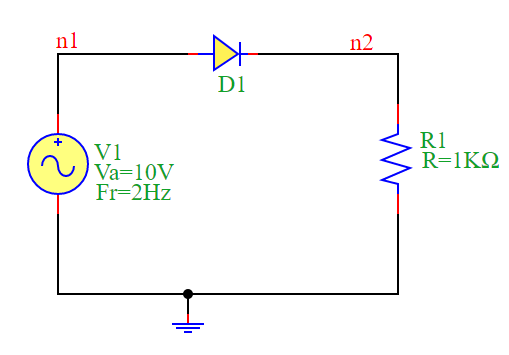

In [1]:
import os
os.chdir('D:\\project\\pyams\\pyams_lib')

In [2]:
from models import circuit,Resistor,SinVoltage,Diode

helow




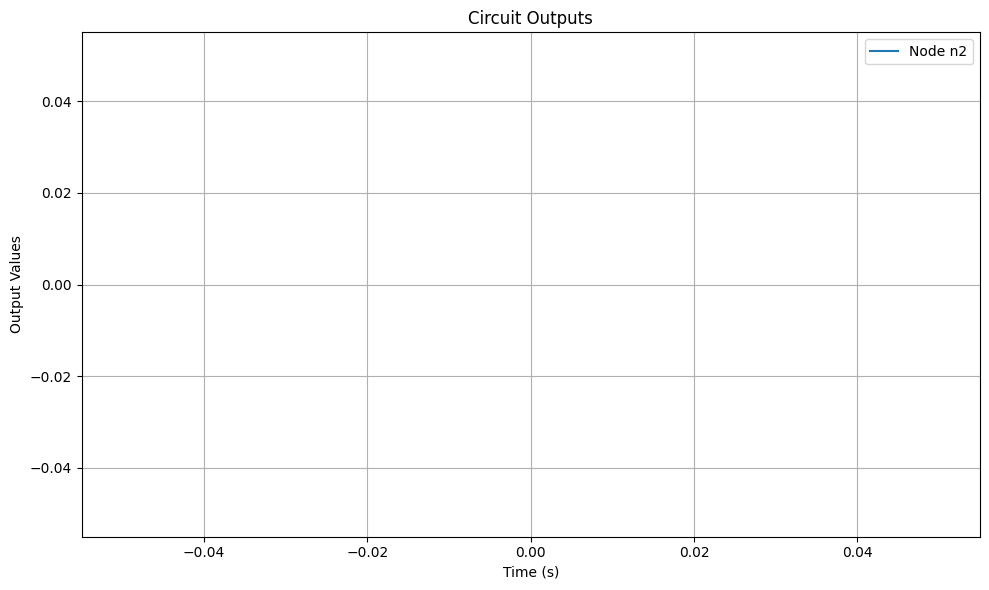

In [3]:
from cad import cirCAD
myCircuit = cirCAD()

# Add elements to the circuit
myCircuit.addElements({
        'V1': SinVoltage('n1', '0'),
        'D1': Diode('n1', 'n2'),
        'R1': Resistor('n2', '0'),
    })

# Set outputs for plotting
myCircuit.setOutPuts('n1','n2')

# Modify parameters of an element
elem=myCircuit.elem
elem['V1'].setParams("Va=10 Ph=0 Voff=0")

#Perform transient analysis
myCircuit.analysis(mode='tran',start=0.0,step=0.01,stop=5)
myCircuit.run()

print('\n')
#plot the results
myCircuit.plot()





In [4]:
print(elem['V1'])

Model:
Signals:
V: 0.0V (voltage, out)

Parameters:
Fr: 2.0 Hz (Frequency of sine wave)
Ph: 0.0 ° (Phase of sine wave)
Va: 10.0 V (Amplitude of sine wave)
Voff: 0.0 V (Voltage offset)


In [5]:
def getAllSignalsParams(circuit)->dict:
    result = {}
    for name, element in circuit.elem.items():
        result[name] = {
            'signals': [{'name': signal.name} for signal in getattr(element, 'getSignals', lambda: [])()],
            'params': [{'name': param.name} for param in getattr(element, 'getParams', lambda: [])()]
        }
    return result

from PyAMS import floatToStr

def getParams(elem)->list:
    return [{'name': param.name, 'description': param.description, 'unit': param.unit, 'value': floatToStr(param.value)} for param in getattr(elem, 'getParams', lambda: [])()]
   

a=getAllSignalsParams(myCircuit)
print(str(a))
b=getParams(elem['V1'])
print(str(b))

print(floatToStr(0))

{'V1': {'signals': [{'name': 'V'}], 'params': [{'name': 'Fr'}, {'name': 'Ph'}, {'name': 'Va'}, {'name': 'Voff'}]}, 'D1': {'signals': [{'name': 'I'}, {'name': 'V'}], 'params': [{'name': 'Iss'}, {'name': 'Vt'}, {'name': 'n'}]}, 'R1': {'signals': [{'name': 'I'}, {'name': 'V'}], 'params': []}}
[{'name': 'Fr', 'description': 'Frequency of sine wave', 'unit': 'Hz', 'value': '2 '}, {'name': 'Ph', 'description': 'Phase of sine wave', 'unit': '°', 'value': '0.00e+00'}, {'name': 'Va', 'description': 'Amplitude of sine wave', 'unit': 'V', 'value': '10 '}, {'name': 'Voff', 'description': 'Voltage offset', 'unit': 'V', 'value': '0.00e+00'}]
0.00e+00
